<a href="https://colab.research.google.com/github/mike23rm/uide-Week_01-DataClean/blob/main/src/AMGD_CP_W1_E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Trabajo 1: Ejercicio de Aplicacion Autonoma

## 📋 Información del Proyecto
- Autores:
  - CARRERA DIAZ CHRISTIAN JAVIER
  - CERNA PACHECHO ROMEL MICHAEL
  - LUNA ARTEAGA ALEXANDER PAUL
- Versión: 1.0.0
- Licencia: MIT


🎯 Objetivos:

Ustedes han sido contratados como el equipo de Data Science para una firma de inversión
inmobiliaria ("PropTech"). La firma quiere comprar propiedades para ponerlas en alquiler vacacional
(tipo Airbnb) pero no saben:
 - Qué barrios son los más rentables.
 - Qué características (amenidades) permiten cobrar más por noche.
 - Cómo se distribuye la demanda a lo largo del año.

El dataset utilizado es el siguiente:

- Berlin(Airbnb): https://data.insideairbnb.com/germany/be/berlin/2025-09-23/data/listings.csv.gz

## 1️⃣ Fase 1: Ingenieria de Datos y Limpieza

## 🚀 1.1. Descarga del dataset

📥 Este código descarga un archivo de Airbnb comprimido y lo guarda en el entorno de trabajo.

In [ ]:
 # importacion de la libreria os que permite interactuar con el sistema operativo (archivos y rutas)

import os

# Define el nombre del archivo comprimido que se descargará
compressed_file_path = 'dataset.csv.gz'

# Descarga el archivo comprimido del dataset de Airbnb desde la web
# El archivo se guarda en el entorno de trabajo actual
!wget 'https://data.insideairbnb.com/germany/be/berlin/2025-09-23/data/listings.csv.gz'

--2026-02-03 20:24:25--  https://data.insideairbnb.com/germany/be/berlin/2025-09-23/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 13.226.251.97, 13.226.251.109, 13.226.251.129, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|13.226.251.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7263842 (6.9M) [application/x-gzip]
Saving to: ‘listings.csv.gz’

listings.csv.gz     100%[===================>]   6.93M  --.-KB/s    in 0.08s   

2026-02-03 20:24:25 (83.1 MB/s) - ‘listings.csv.gz’ saved [7263842/7263842]



📥 Importa la librería Pandas para la manipulación y análisis de datos.

In [ ]:
import pandas as pd

## 🚀 1.2. Previsualizacion y validacion

📥 Carga el dataset desde un archivo CSV comprimido, valida que tenga al menos 10.000 registros y muestra un resumen estadístico de sus columnas numéricas.

In [ ]:
# Define la ruta del archivo comprimido que contiene el dataset
compressed_file_path = 'listings.csv.gz'

# Carga el archivo CSV comprimido (.gz) en un DataFrame de Pandas
df = pd.read_csv(compressed_file_path)

# Valida que el dataset tenga al menos 10.000 registros, como solicita el ejercicio
if df.shape[0] < 10000:
    # Lanza una excepción si no se cumple el mínimo de registros
    raise Exception
else:
  # Muestra un mensaje de confirmación si el dataset es válido
  print(f'Dataset validado, el dataset contiene {df.shape[0]} registros \n')

# Muestra un resumen estadístico de las columnas numéricas del dataset
df.describe()

Dataset validado, el dataset contiene 14274 registros 



,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.427400e+04,1.427400e+04,1.427400e+04,14260.000000,14260.000000,14274.000000,14274.000000,14274.000000,9330.000000,12250.000000,...,10960.000000,10957.000000,10959.000000,10957.000000,10956.000000,14274.000000,14274.00000,14274.000000,14274.000000,10960.000000
mean,5.216123e+17,2.025092e+13,1.916958e+08,25.747966,29.718373,52.508918,13.402307,3.052963,1.147856,1.356898,...,4.698032,4.826761,4.820638,4.761114,4.647221,14.070898,11.89022,1.973939,0.144529,1.298455
std,5.756023e+17,6.054900e+00,2.097931e+08,106.650292,126.145753,0.033824,0.068137,1.925029,0.480433,0.834283,...,0.404522,0.324465,0.366855,0.328695,0.404457,48.440490,46.97473,11.317932,1.527690,2.083910
min,3.176000e+03,2.025092e+13,1.581000e+03,1.000000,1.000000,52.341716,13.116893,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.010000
25%,2.152686e+07,2.025092e+13,1.767847e+07,1.000000,1.000000,52.490116,13.362065,2.000000,1.000000,1.000000,...,4.590000,4.790000,4.800000,4.670000,4.540000,1.000000,0.00000,0.000000,0.000000,0.130000
50%,5.203228e+07,2.025092e+13,8.970318e+07,1.000000,2.000000,52.509250,13.409885,2.000000,1.000000,1.000000,...,4.810000,4.920000,4.930000,4.840000,4.730000,1.000000,1.00000,0.000000,0.000000,0.560000
75%,1.096245e+18,2.025092e+13,3.622977e+08,5.000000,7.000000,52.531755,13.438165,4.000000,1.000000,2.000000,...,4.970000,5.000000,5.000000,5.000000,4.880000,5.000000,2.00000,1.000000,0.000000,1.830000
max,1.516055e+18,2.025092e+13,7.192701e+08,1359.000000,2112.000000,52.656110,13.721390,16.000000,15.000000,14.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,311.000000,311.00000,114.000000,24.000000,48.870000


🔍 Se revisa la **estructura del dataset** y el tipo de datos de las variables a trabajar utilizando el método `info()`.

In [ ]:
# Informacion las columnas relevantes
df[['price', 'amenities', 'last_review', 'latitude', 'longitude','room_type','neighbourhood_cleansed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14274 entries, 0 to 14273
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   9264 non-null   object 
 1   amenities               14274 non-null  object 
 2   last_review             10960 non-null  object 
 3   latitude                14274 non-null  float64
 4   longitude               14274 non-null  float64
 5   room_type               14274 non-null  object 
 6   neighbourhood_cleansed  14274 non-null  object 
dtypes: float64(2), object(5)
memory usage: 780.7+ KB


## 🚀 1.3. Transformacion de datos de la columna price

🔍 Detección de valores nulos y total de registros en precios

In [ ]:
# Se crea un nuevo DataFrame para resumir información de la columna 'price'
pd.DataFrame({

    # Columna que almacena el total de registros (filas) existentes en 'price'
    'Total_registros_Precios': [
        df['price'].shape[0]  # shape[0] devuelve la cantidad total de filas
    ],

    # Columna que almacena la cantidad de valores nulos (NaN) en 'price'
    'Valores_nulos': [
        df['price'].isna().sum()  # isna() detecta nulos y sum() los cuenta
    ]
})


,Total_registros_Precios,Valores_nulos
0,14274,5010


Muestra los **primeros 11 valores** de la columna `price` del DataFrame `df`, correspondientes a los **valores iniciales**.

In [ ]:
df['price'].head(11)

,price
0,$105.00
1,$135.00
2,$75.00
3,$32.00
4,$202.00
5,NaN
6,$152.00
7,$65.00
8,$260.00
9,$70.00


Se debe transformar el valor de la columna "price" en un valor manejable

In [ ]:
# Valores de la columna actualmente

df['price'].unique()

array(['$105.00', '$135.00', '$75.00', '$32.00', '$202.00', nan,
       '$152.00', '$65.00', '$260.00', '$70.00', '$172.00', '$60.00',
       '$54.00', '$200.00', '$290.00', '$240.00', '$282.00', '$144.00',
       '$137.00', '$106.00', '$99.00', '$68.00', '$293.00', '$94.00',
       '$175.00', '$131.00', '$95.00', '$58.00', '$113.00', '$136.00',
       '$165.00', '$100.00', '$185.00', '$49.00', '$80.00', '$340.00',
       '$237.00', '$45.00', '$120.00', '$67.00', '$118.00', '$110.00',
       '$50.00', '$44.00', '$84.00', '$112.00', '$107.00', '$151.00',
       '$28.00', '$55.00', '$123.00', '$146.00', '$89.00', '$85.00',
       '$179.00', '$140.00', '$77.00', '$276.00', '$92.00', '$72.00',
       '$127.00', '$71.00', '$111.00', '$82.00', '$104.00', '$81.00',
       '$148.00', '$18.00', '$20.00', '$157.00', '$108.00', '$90.00',
       '$74.00', '$35.00', '$306.00', '$161.00', '$62.00', '$91.00',
       '$30.00', '$56.00', '$59.00', '$116.00', '$115.00', '$101.00',
       '$125.00', '$86

### 1️⃣ Limpieza de Strings en Precios

La columna **`price`** no es numérica, por lo que se debe crear una función que elimine los símbolos **`$`**, **`,`** y convierta los valores a tipo **`float`**.

Limpiar la variable objetivo (`price`).

In [ ]:
# Define una función para limpiar y convertir el valor del precio a formato numérico
def limpiar_precio(precio):
    # Verifica si el valor es nulo (NaN)
    if pd.isna(precio):
        return None  # Retorna None si el precio es nulo

    # Convierte el precio a texto, elimina símbolos y lo transforma a número decimal
    return float(
        str(precio)        # Convierte el valor a string
        .replace('$', '')  # Elimina el símbolo de dólar
        .replace(',', '')  # Elimina las comas
        .strip()           # Elimina espacios en blanco
    )

# Sobrescribir la misma columna price
df['price'] = df['price'].apply(limpiar_precio)

# Mostrar los primeros registros con dos decimales
df[['price']].head(11).style.format({'price': '{:.2f}'})

,price
0,105.00
1,135.00
2,75.00
3,32.00
4,202.00
5,nan
6,152.00
7,65.00
8,260.00
9,70.00


Muestra que el **tipo de dato** de la columna `price` ha sido cambiado a **`float64`**

In [ ]:
# Muestra información general de la columna 'price'
df[['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14274 entries, 0 to 14273
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   9264 non-null   float64
dtypes: float64(1)
memory usage: 111.6 KB


Muestra los **primeros 11 valores** de la columna `price` del DataFrame `df` después del proceso de **limpieza de datos**

In [ ]:
#Muestra los primeros 11 valores de la columna 'price'
df['price'].head(11)

,price
0,105.0
1,135.0
2,75.0
3,32.0
4,202.0
5,NaN
6,152.0
7,65.0
8,260.0
9,70.0


### 2️⃣ Tratamiento de Valores Nulos

Identificar las columnas que presentan **más del 30 % de valores nulos** para decidir su eliminación.  
En el caso de **columnas críticas con pocos valores faltantes**, se realiza la **imputación de datos**.

El código **analiza los valores nulos**, elimina las columnas con **más del 30 % de datos faltantes** y muestra un **comparativo del número de columnas antes y después** del proceso de limpieza.


In [ ]:
# Obtiene el número total de columnas del DataFrame original
total_columnas_antes = df.shape[1]
total_columnas_antes  # Muestra el total de columnas antes del tratamiento

# Calcula el porcentaje de valores nulos por cada columna
nulos = (
    df.isna()          # Identifica valores nulos (NaN)
      .mean()          # Calcula la proporción de nulos por columna
      .mul(100)        # Convierte la proporción a porcentaje
      .round(2)        # Redondea a 2 decimales
      .reset_index()   # Convierte el índice en una columna
)

# Renombra las columnas del DataFrame resultante
nulos.columns = ['Columna', 'Porcentaje_nulos']

# Selecciona las columnas que tienen más del 30% de valores nulos
columnas_mayor_30 = (
    nulos[nulos['Porcentaje_nulos'] > 30]['Columna']
    .tolist()          # Convierte los nombres de columnas a una lista
)

# Elimina del DataFrame las columnas con más del 30% de nulos
df_reducido = df.drop(columns=columnas_mayor_30)

# Obtiene el total de columnas después de eliminar las columnas con muchos nulos
total_columnas_despues = df_reducido.shape[1]
total_columnas_despues  # Muestra el total de columnas después del tratamiento

# Crea un DataFrame resumen con el antes y después del tratamiento de columnas
resumen_columnas = pd.DataFrame({
    'Estado': ['Antes del tratamiento', 'Después del tratamiento'],
    'Total_columnas': [total_columnas_antes, total_columnas_despues]
})

# Muestra el resumen final
resumen_columnas




,Estado,Total_columnas
0,Antes del tratamiento,79
1,Después del tratamiento,66


### 3️⃣ Ingeniería de Características (Feature Engineering)

Crear una columna **`price_per_person`**, calculada como el **precio dividido entre el número de huéspedes** que puede acomodar la propiedad.

In [ ]:
# Calcula el precio por persona dividiendo el precio total entre la capacidad
# (se asume que 'accommodates' indica cuántas personas pueden alojarse)
df['price_per_person'] = df['price'] / df['accommodates']

# Reemplaza resultados inválidos de la división (infinito o -infinito)
# Estos casos ocurren cuando 'accommodates' es 0 o nulo
df['price_per_person'] = df['price_per_person'].replace(
    [float('inf'), -float('inf')], pd.NA
)

# Muestra una vista rápida de las primeras 10 filas
# Aplica formato con 2 decimales a las columnas de precios
df[['price', 'accommodates', 'price_per_person']].head(10).style.format({
    'price': '{:.2f}',
    'price_per_person': '{:.2f}'
})

,price,accommodates,price_per_person
0,105.00,2,52.50
1,135.00,7,19.29
2,75.00,1,75.00
3,32.00,2,16.00
4,202.00,4,50.50
5,nan,2,nan
6,152.00,5,30.40
7,65.00,4,16.25
8,260.00,4,65.00
9,70.00,1,70.00


Crear una columna binaria **`is_luxury`**, que toma el valor **1** si el precio es mayor al **percentil 75 del barrio** y **0** en caso contrario.


In [ ]:
# Calcula el percentil 75 del precio dentro de cada barrio
# Es decir, obtiene el valor por encima del cual está el 25% de los precios más al
p75_barrio = df.groupby('neighbourhood_cleansed')['price'].transform(
    lambda x: x.quantile(0.75)
)

# Crea una nueva columna binaria llamada 'is_luxury'
# Toma el valor 1 si el precio es mayor al percentil 75 de su barrio
# Toma el valor 0 en caso contrario
df['is_luxury'] = (df['price'] > p75_barrio).astype(int)

# Cuenta cuántos registros pertenecen a cada categoría (0 = no lujo, 1 = lujo)
df['is_luxury'].value_counts()


,count
is_luxury,
0,11969
1,2305



### 🧩 Parsing de Texto (Amenidades)

La columna **`amenities`**  representa una lista.  
Se debe transformar este texto para:

- Contar cuántas amenidades tiene cada propiedad.
- Crear variables *dummy* para las amenidades más importantes  
  (por ejemplo: **( ¿Tiene Wifi? 1 o 0).**).

In [ ]:
# Crea un DataFrame resumen para analizar la columna 'amenities'
pd.DataFrame({
    # Columna que muestra el total de registros existentes en 'amenities'
    'Total_registros_amenities': [df['amenities'].shape[0]], # Número total de filas de la columna
    # Columna que muestra la cantidad de valores nulos (NaN) en 'amenities'
    'Valores_nulos': [df['amenities'].isna().sum()] # Conteo de valores faltantes
})

,Total_registros_amenities,Valores_nulos
0,14274,0


Muestra los **primeros 11 valores** de la columna `amenities`  y `property_type`  del DataFrame `df`.

In [ ]:
# Muestra los primeros 11 registros de las columnas 'amenities' y 'property_type'
df[['amenities', 'property_type']].head(11)

,amenities,property_type
0,"[""Cooking basics"", ""Wine glasses"", ""Crib"", ""Ho...",Entire rental unit
1,"[""Cooking basics"", ""Crib"", ""Stove"", ""Elevator""...",Entire rental unit
2,"[""Ethernet connection"", ""Dishes and silverware...",Entire rental unit
3,"[""Cooking basics"", ""Building staff"", ""Essentia...",Entire rental unit
4,"[""Cooking basics"", ""Crib"", ""Elevator"", ""High c...",Entire loft
5,"[""Cooking basics"", ""Wine glasses"", ""Drying rac...",Entire rental unit
6,"[""Cooking basics"", ""Wine glasses"", ""Crib"", ""Ba...",Entire rental unit
7,"[""Cooking basics"", ""Crib"", ""Stove"", ""High chai...",Entire condo
8,"[""Cooking basics"", ""Wine glasses"", ""Crib"", ""Sh...",Entire condo
9,"[""Ethernet connection"", ""Dishes and silverware...",Entire rental unit


El código **limpia y transforma** la columna `amenities`, crea **variables útiles** (conteo y presencia de servicios clave) y genera una **tabla comparativa** para el análisis.


In [ ]:
#importacion librerias
import ast
import pandas as pd

# Función para convertir la columna 'amenities' de texto a lista
def parsear_amenities(amenities):
    # Si el valor es nulo, retorna una lista vacía
    if pd.isna(amenities):
        return []
    try:
        # Convierte el texto que representa una lista en una lista real de Python
        return ast.literal_eval(amenities)
    except (ValueError, SyntaxError):
      # Si hay errores de formato, retorna una lista vacía
        return []

# Crea una nueva columna con el número de amenities por alojamiento
df['amenities_count'] = df['amenities'].apply(parsear_amenities).apply(len)

# Lista de amenities considerados importantes para el análisis
amenities_importantes = ['Wifi', 'Kitchen', 'Heating', 'Air conditioning']

# Convierte la columna 'amenities' a listas para reutilizarla
amenities_parsed = df['amenities'].apply(parsear_amenities)

# Crea columnas binarias indicando si cada amenity importante está presente
for amenity in amenities_importantes:
    df[f'has_{amenity.lower().replace(" ", "_")}'] = amenities_parsed.apply(
        # Devuelve 1 si el amenity está presente (ignorando mayúsculas/minúsculas), 0 si no
        lambda x: int(amenity.lower() in [a.lower() for a in x])
    )

# Crea una tabla resumen agrupando por tipo de propiedad
# Se suman los amenities totales y la presencia de amenities importantes
tabla_resumen = (
    df
    .groupby('property_type')[['amenities_count'] +
        [f'has_{a.lower().replace(" ", "_")}' for a in amenities_importantes]]
    .sum()
    .reset_index()
)

# Muestra la tabla resumen final
tabla_resumen

,property_type,amenities_count,has_wifi,has_kitchen,has_heating,has_air_conditioning
0,Boat,517,11,15,7,2
1,Camper/RV,179,5,9,5,1
2,Campsite,17,0,1,0,0
3,Casa particular,45,0,1,0,0
4,Castle,35,1,1,1,0
...,...,...,...,...,...,...
60,Shared room in hotel,511,22,11,15,1
61,Shared room in rental unit,406,18,18,11,1
62,Shared room in serviced apartment,36,1,1,0,0
63,Shepherd’s hut,6,1,0,1,0


## 🚀 1.4. Revision de columnas en nulo mayor al 30%

Se debe transformar el valor de la columna "price" en un valor manejable

In [ ]:

# Ahora revisaremos los nulos en las columnas
df_is_navalues = df.isna().sum()
df_is_navalues_percentage = df_is_navalues / df.shape[0] * 100

# Colunas que no tienen valor. Como se muestra en el resultado tenemos al menos las columnas
# price, amenities, last_review, room_type, latitude, longitude.

print(df_is_navalues_percentage[df_is_navalues_percentage > 30].map('{:.2f}%'.format))

neighborhood_overview       54.64%
host_about                  47.93%
host_response_time          35.15%
host_response_rate          35.15%
host_acceptance_rate        31.37%
host_neighbourhood          59.27%
neighbourhood               54.64%
bathrooms                   34.64%
beds                        34.99%
price                       35.10%
calendar_updated           100.00%
estimated_revenue_l365d     35.10%
license                     34.87%
price_per_person            35.10%
dtype: object


In [ ]:
# Como la columna price tiene 35% de datos la llenaremos con 0 para evitar problemas en el analisis

df['price'] = df['price'].fillna(0)

# Tambien llenaremos con 0 la columna estimated_revenue_l365d para la conclusion
df['estimated_revenue_l365d'] = df['estimated_revenue_l365d'].fillna(0)

# Realizamos la validacion nuevamente
df_is_navalues = df.isna().sum()
df_is_navalues_percentage = df_is_navalues / df.shape[0] * 100

# Ya no aparecen las columnas
# price, amenities, last_review, room_type, latitude, longitude.

print(df_is_navalues_percentage[df_is_navalues_percentage > 30].map('{:.2f}%'.format))

neighborhood_overview     54.64%
host_about                47.93%
host_response_time        35.15%
host_response_rate        35.15%
host_acceptance_rate      31.37%
host_neighbourhood        59.27%
neighbourhood             54.64%
bathrooms                 34.64%
beds                      34.99%
calendar_updated         100.00%
license                   34.87%
price_per_person          35.10%
dtype: object


In [ ]:
# Limpiamos el dataframe con las columnas antes analizadas
df_clean = df.drop(columns=df_is_navalues_percentage[df_is_navalues_percentage > 30].index)

if df_clean.shape[0] < 10000:
  print(f'Dataset no validado, el dataset contiene {df_clean.shape[0]} registros \n')
  raise Exception
else:
  print(f'Dataset validado, el dataset contiene {df_clean.shape[0]} registros \n')

# Imprimios el resultado
print(f'El dataset limpio contiene {df_clean.shape[0]} registros y {df_clean.shape[1]} columnas \n')
df_clean.describe()


Dataset validado, el dataset contiene 14274 registros 

El dataset limpio contiene 14274 registros y 74 columnas 



,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,is_luxury,amenities_count,has_wifi,has_kitchen,has_heating,has_air_conditioning
count,1.427400e+04,1.427400e+04,1.427400e+04,14260.000000,14260.000000,14274.000000,14274.000000,14274.000000,12250.000000,14274.000000,...,14274.00000,14274.000000,14274.000000,10960.000000,14274.000000,14274.000000,14274.000000,14274.000000,14274.000000,14274.00000
mean,5.216123e+17,2.025092e+13,1.916958e+08,25.747966,29.718373,52.508918,13.402307,3.052963,1.356898,130.607468,...,11.89022,1.973939,0.144529,1.298455,0.161482,26.572439,0.911938,0.901639,0.649292,0.04862
std,5.756023e+17,6.054900e+00,2.097931e+08,106.650292,126.145753,0.033824,0.068137,1.925029,0.834283,1338.318341,...,46.97473,11.317932,1.527690,2.083910,0.367988,15.282032,0.283395,0.297812,0.477208,0.21508
min,3.176000e+03,2.025092e+13,1.581000e+03,1.000000,1.000000,52.341716,13.116893,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.152686e+07,2.025092e+13,1.767847e+07,1.000000,1.000000,52.490116,13.362065,2.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.130000,0.000000,13.000000,1.000000,1.000000,0.000000,0.00000
50%,5.203228e+07,2.025092e+13,8.970318e+07,1.000000,2.000000,52.509250,13.409885,2.000000,1.000000,68.000000,...,1.00000,0.000000,0.000000,0.560000,0.000000,26.000000,1.000000,1.000000,1.000000,0.00000
75%,1.096245e+18,2.025092e+13,3.622977e+08,5.000000,7.000000,52.531755,13.438165,4.000000,2.000000,126.000000,...,2.00000,1.000000,0.000000,1.830000,0.000000,38.000000,1.000000,1.000000,1.000000,0.00000
max,1.516055e+18,2.025092e+13,7.192701e+08,1359.000000,2112.000000,52.656110,13.721390,16.000000,14.000000,50000.000000,...,311.00000,114.000000,24.000000,48.870000,1.000000,85.000000,1.000000,1.000000,1.000000,1.00000


## 🚀 1.5. Ingenieria de caracterisitcas

- Crear una columna price_per_person (Precio / Número de huéspedes que
acomoda).
- Crear una columna binaria is_luxury (Si el precio es mayor al percentil 75 del barrio).

In [ ]:
# Validamos que la columna escogida no tenga valores nulos o vacios porque necesitamos eso para crear la columna de lujo
print(f'el total de valores nulos es :{df_clean.neighbourhood_group_cleansed.isnull().sum()}')

# Valores de los barrios de este grupo
print(f'Barrios registrados de Airbnb: {df_clean.neighbourhood_group_cleansed.unique()}')


el total de valores nulos es :0
Barrios registrados de Airbnb: ['Pankow' 'Neukölln' 'Mitte' 'Friedrichshain-Kreuzberg'
 'Charlottenburg-Wilm.' 'Tempelhof - Schöneberg' 'Lichtenberg'
 'Treptow - Köpenick' 'Steglitz - Zehlendorf' 'Spandau' 'Reinickendorf'
 'Marzahn - Hellersdorf']


In [ ]:
# Creacion de la columna price_per_person

df_clean['price_per_person'] = (df_clean['price'] / df_clean['accommodates']).astype(float).map('{:.2f}'.format)

# Creacion de la columna binaria is_luxury
# Primero realizaremos una comparacion de lujo por vecinadario para que pueda ser util en otros analisis, eso puede ser mas preciso para un inversionista

p75_neigborhood = df_clean.groupby('neighbourhood_group_cleansed')['price'].transform(lambda x: x.quantile(0.75))
df_clean['is_luxury'] = (df_clean['price'] > p75_neigborhood).astype(int)

df_clean[['price_per_person','neighbourhood_group_cleansed','is_luxury']]

,price_per_person,neighbourhood_group_cleansed,is_luxury
0,52.50,Pankow,0
1,19.29,Pankow,0
2,75.00,Pankow,0
3,16.00,Neukölln,0
4,50.50,Pankow,1
...,...,...,...
14269,22.50,Mitte,0
14270,22.00,Neukölln,0
14271,40.50,Friedrichshain-Kreuzberg,0
14272,31.50,Neukölln,0


## 🚀 1.6. Limpieza de Amenidades

- Parsing de Texto (Amenidades): La columna amenities es un string que parece una lista.
Deberán investigar cómo contar cuántas amenidades tiene cada propiedad o crear
variables dummy para las más importantes (ej: ¿Tiene Wifi? 1 o 0).

In [ ]:
# Validamos los valores de la columna de Amenidades

df_clean['amenities'].unique()

array(['["Cooking basics", "Wine glasses", "Crib", "Hot water kettle", "Baking sheet", "Stove", "High chair", "Books and reading material", "Cleaning products", "Patio or balcony", "Heating", "TV", "Bed linens", "Outdoor dining area", "Oven", "Toaster", "Clothing storage", "Fire extinguisher", "Kitchen", "Host greets you", "Iron", "Hot water", "Wifi", "Smoke alarm", "Coffee", "Outdoor furniture", "Essentials", "Ethernet connection", "Coffee maker", "Washer", "First aid kit", "Long term stays allowed", "Extra pillows and blankets", "Dining table", "Dishes and silverware", "Hair dryer", "Children\\u2019s dinnerware", "Bathtub", "Hangers", "Freezer", "Carbon monoxide alarm", "Refrigerator", "Private hot tub", "Board games"]',
       '["Cooking basics", "Crib", "Stove", "Elevator", "Luggage dropoff allowed", "High chair", "Heating", "Bed linens", "Oven", "Paid parking off premises", "Kitchen", "Iron", "Hot water", "Wifi", "Smoke alarm", "Room-darkening shades", "TV with standard cable", "M

In [ ]:
import ast

# Convertimos el valor en una lista

amenidades_expandidas = df['amenities']

# Esto transforma el texto en un objeto lista de Python
amenidades_expandidas = amenidades_expandidas.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Le damos un valor por cada item de las amnidades del dataset
amenidades_expandidas = amenidades_expandidas.explode().value_counts()

# Vamos a obtener las amenidades que del conteo de amnidades/ total de registros sean > 40%
amenidades_expandidas[amenidades_expandidas > (df_clean.shape[0] * 0.40)]

# Con esas amenidades podria tener una propiedad para renta que supera las expectativas segun la web de Airbnb https://www.smoobu.com/en/guides/airbnb/airbnb-amenities-guide/#:~:text=Para%20ser%20un%20anfitri%C3%B3n%20exitoso,estancia%20c%C3%B3moda%20y%20sin%20complicaciones.
# Por ello las columnas seran agregadas al dataframe principal como binario


,count
amenities,
Wifi,13017
Kitchen,12870
Essentials,10684
Smoke alarm,10680
Hair dryer,10305
Hot water,10124
Hangers,9779
Heating,9268
Dishes and silverware,9020


In [ ]:
df_clean['amenities'] = df_clean['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Empezamos a crear las columnas con binarios de acuerdo al anterior criterio
amenidades_required = ["Wifi", "Kitchen", "Essentials", "Smoke alarm", "Hair dryer", "Hot water", "Hangers", "Heating", "Dishes and silverware", "Bed linens", "Cooking basics", "Refrigerator", "Washer", "Iron", "Dedicated workspace", "Shampoo", "Hot water kettle", "TV", "Dishwasher"]

for amenity in amenidades_required:
  df_clean[f'has_{amenity.replace(' ','_').lower()}'] = df_clean['amenities'].apply(lambda x: 1 if f'{amenity}' in x else 0)

df_clean.filter(regex='has_').head()

,host_has_profile_pic,has_availability,has_wifi,has_kitchen,has_heating,has_air_conditioning,has_essentials,has_smoke_alarm,has_hair_dryer,has_hot_water,...,has_bed_linens,has_cooking_basics,has_refrigerator,has_washer,has_iron,has_dedicated_workspace,has_shampoo,has_hot_water_kettle,has_tv,has_dishwasher
0,t,t,1,1,1,0,1,1,1,1,...,1,1,1,1,1,0,0,1,1,0
1,t,t,1,1,1,0,1,1,1,1,...,1,1,1,1,1,0,0,0,0,1
2,t,t,1,1,1,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
3,t,t,1,1,1,0,1,0,1,1,...,0,1,1,0,1,0,0,0,1,0
4,t,t,1,1,1,0,1,1,1,1,...,0,1,1,0,1,0,0,0,0,1


## 🚀 1.7. Imputación Lógica:

Si falta el review_scores_rating, ¿lo rellenan con la media o asumen que
es 0 porque nadie opinó? Deben justificar su decisión. *italicized text*

In [ ]:
# En este punto analizaremos cuantas resenas faltan de rellenar

print(f'El numero de reseñas sin calificacion es {df_clean["review_scores_rating"].isna().sum()} y el total de registros es {df_clean.shape[0]}.\nEl procentaje de faltantes es: {(df_clean["review_scores_rating"].isna().sum() / df_clean.shape[0] * 100)}%')

# En conclusion, al ser una cuarta parte del dataset puede influenciar en el analisis.
# Por lo tanto, lo mas realista seria rellenarlo en 0 porque puede ser una propiedad nueva en el mercado o su actividad es baja.
# Entendido esto rellenaremos ese faltante

df_clean['review_scores_rating'] = df_clean['review_scores_rating'].fillna(0)

print(f'El número de resenas sin calificacion es {df_clean["review_scores_rating"].isna().sum()}')

# Para confirmar cuales propiedades son nuevas realizaremos esta validacion
nulos_new_properties = df_clean[(df_clean['review_scores_rating'] == 0) & (df_clean['number_of_reviews'] == 0)]
print(f'Propiedades nuevas sin reviews y rating es: {nulos_new_properties.shape[0]}')

#Luego de validar todo lo anterior encontramos que si son propiedades nuevas sin rating y se puede tratar como lo pensamos

El numero de reseñas sin calificacion es 0 y el total de registros es 14274.
El procentaje de faltantes es: 0.0%
El numero de resenas sin calificacion es 0
Propiedades nuevas sin reviews y rating es: 3314


## 🚀 1.8. Formateo de fechas y Creacion de columna de geolocalizacion con tuplas

Las siguientes columnas necesitamos formaterlas a un formato de fecha y crear la columna de geolocalizacion
- last_review: Fechas que requieren conversión.
- latitude / longitude: Datos geoespaciales.

In [ ]:
# Primeramente crearemos una columna binario para validar si tiene una fecha de review

df_clean['never_rented'] = df_clean['last_review'].isna().astype(int)

# Se va a colocar la fecha comodin '1900-01-01' para el analisis
df_clean['last_review'] = df_clean['last_review'].fillna('1900-01-01')

print(f'Fechas unicas del dataset {df_clean['last_review'].unique()}')


# En segundo punto vamos a crear la columna geolocalizacion con una tupla

df_clean['geo_location'] = list(zip(df_clean['latitude'], df_clean['longitude']))

print(df_clean['geo_location'].head())

Fechas unicas del dataset ['2025-08-09' '2020-01-04' '2023-11-30' ... '2024-12-18' '2024-11-18'
 '2025-03-08']
0     (52.53471, 13.4181)
1    (52.53269, 13.41805)
2    (52.54813, 13.40366)
3    (52.49419, 13.42166)
4    (52.53711, 13.40888)
Name: geo_location, dtype: object


## 🚀 1.9. Manejo de Outliers Reales
- Encontrarán mansiones de 10,000 la noche y errores de $0.
Deberán aplicar criterio estadístico (Rango Intercuartílico - IQR) para filtrar la data y no sesgar el análisis.

El dataset contiene 93 columnas
El rango intercuartilico es 126.0


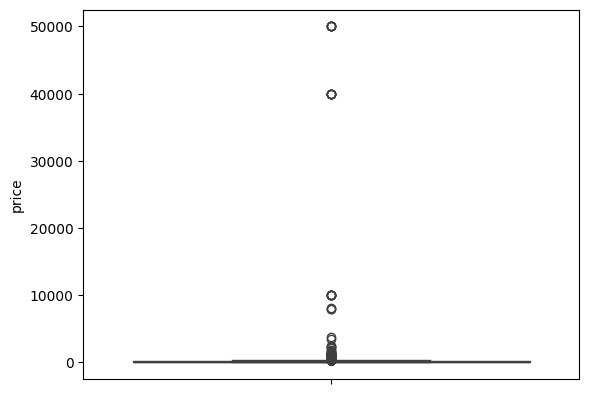

In [ ]:
# Investigando en la web se encontro que con la siguiente expresion puedo validar cuales valores son mas atipicos

# Existen en el dataset las columnas eliminadas por isna y tambien las agregadas por las amenidades

print(f'El dataset contiene {df_clean.shape[1]} columnas')

# Validamos la columna precio que sera la usada para eliminar los outliers
import seaborn as sns

sns.boxplot(df_clean['price'])

QA1 = df_clean['price'].quantile(0.25)
QA3 = df_clean['price'].quantile(0.75)
IQR = QA3 - QA1

print(f'El rango intercuartilico es {IQR}')


In [ ]:
# Definiremos los limites de seguridad para definiar los valores atipicos

inf_limit = QA1 - 1.5 * IQR
sup_limit = QA3 + 1.5 * IQR

print(f'El limite inferior es {inf_limit}')
print(f'El limite superior es {sup_limit}')

# Crearemos una copia para el analisis del EDA
df_clean_eda = df_clean.copy()

# Imprimimos el total de registros antes de la limpieza
print(f'El total de registros antes de la limpieza es {df_clean.shape[0]}')

# Hacemos la limpieza
df_clean = df_clean[(df_clean['price'] > inf_limit) & (df_clean['price'] < sup_limit)]

print(f'El total de registros despues de la limpieza es {df_clean.shape[0]}')

El limite inferior es -189.0
El limite superior es 315.0
El total de registros antes de la limpieza es 14274
El total de registros despues de la limpieza es 13862


## 2️⃣ Fase 2: Analisis Exporatorio (EDA)

## 🚀 2.1.  Análisis Univariado:

Histograma de precios (antes y después de quitar outliers). ¿Sigue una
distribución normal?

In [ ]:
# Importacion de librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Precios sin Outliers')

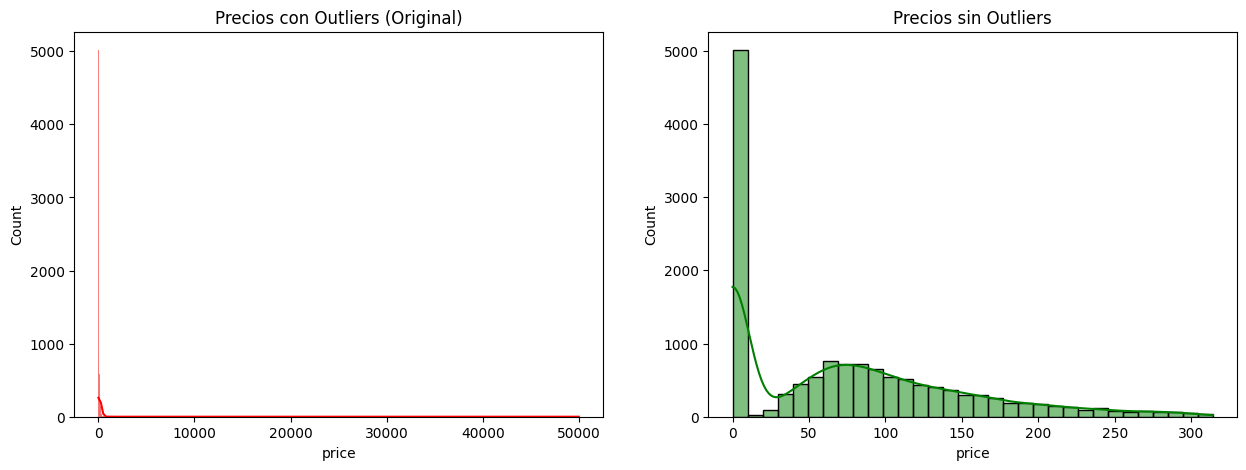

In [ ]:
# Vamor a realizar un analisis de la distrubicion normal de los precios mediante un histograma

# Antes de la eliminacion de los outliers
# Configurar el espacio para dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma ANTES (Con outliers)
sns.histplot(df_clean_eda['price'], kde=True, ax=axes[0], color='red')
axes[0].set_title('Precios con Outliers (Original)')

# Histograma Despues(Sin outliers)
sns.histplot(df_clean['price'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Precios sin Outliers')

# Este graficos, especificamente el grafico del Precios sin Outliers no sigue una distribucion ya que tenemos datos sesgados debido a los precios.
# Muchas propiedades tienen precios bajos que producen el sesgo y pocas tienes un precio distribuido o extremadamente caro


## 🚀 2.2.  Análisis Bivariado:
- Precio vs. Tipo de Alojamiento (Boxplot).
- Precio vs. Barrio (Top 10 barrios más caros - Barplot).

/tmp/ipython-input-3188695109.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_barrios.index, y=top_10_barrios.values, ax=axes[1], palette='viridis')


Text(0.5, 1.0, 'Precio vs. Barrio (Top 10 barrios más caros)')

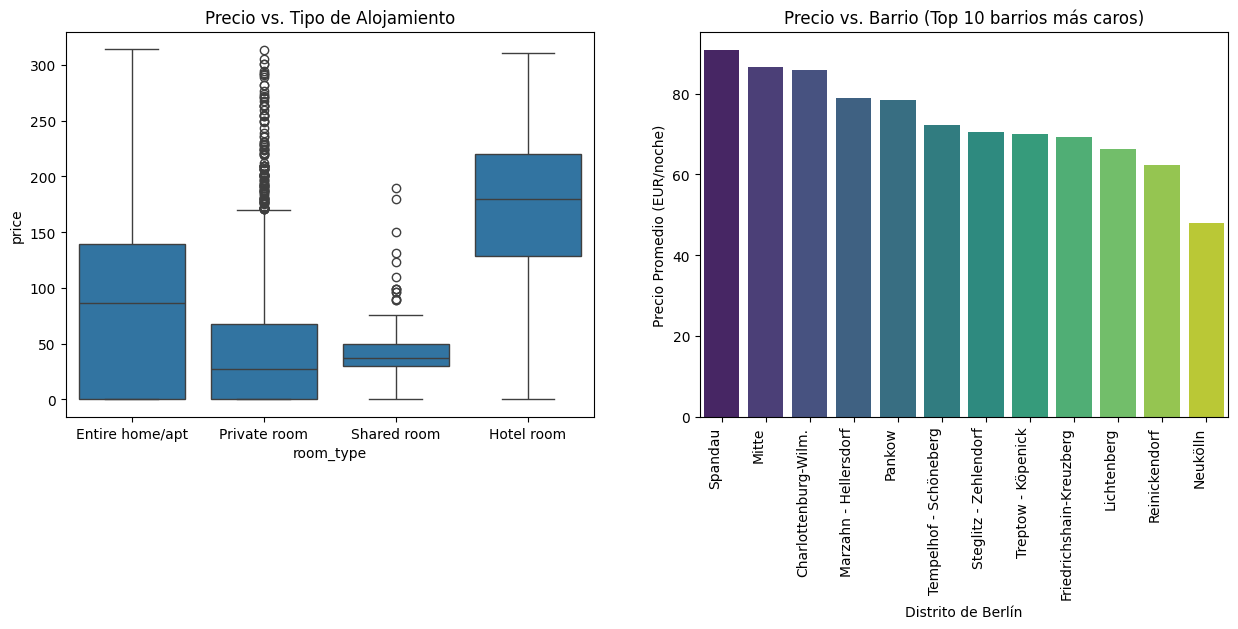

In [ ]:
# Primeramente haremos el analisis de precio vs tipo de alojamiento en un tipo de grafico boxplot

# Configurar el espacio para dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Precio vs Tipo de ALojamiento (Boxplot)
sns.boxplot(x='room_type', y='price', data=df_clean, ax=axes[0])
axes[0].set_title('Precio vs. Tipo de Alojamiento')

# 2. Precio vs Barrio (Top 10 barrios mas caros)
top_10_barrios = df_clean.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)
sns.barplot(x=top_10_barrios.index, y=top_10_barrios.values, ax=axes[1], palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Distrito de Berlín')
plt.ylabel('Precio Promedio (EUR/noche)')

axes[1].set_title('Precio vs. Barrio (Top 10 barrios más caros)')

# Segun el grafico se realiza mas alojamientos como privado pero son mas caras que el resto de categorias.
# Por otro lado los 10 barrios mas caros el mas caro es mayor a 80 euros y el mas barato esta entre los 40 euros

## 🚀 2.3.  Correlaciones:
- Mapa de calor (Heatmap) mostrando la correlación entre price,
accommodates, number_of_reviews, y review_scores_rating.

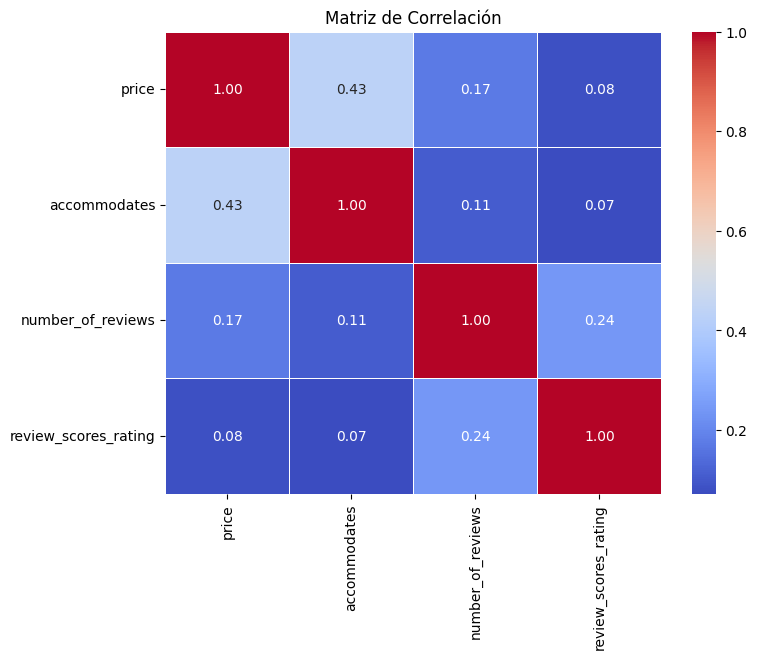

In [ ]:
# En este punto haremos la correlacion entre los capos antes expuestos

df_numerico = df_clean[['price', 'accommodates', 'number_of_reviews', 'review_scores_rating']]

# Creamos la matriz de correlacion
m_correlacion = df_numerico.corr()

# Creamos el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(
    m_correlacion,
    annot=True,      # Muestra los coeficientes numéricos
    cmap='coolwarm', # Usa un esquema de color de rojo a azul
    fmt=".2f",       # Formatea a dos decimales
    linewidths=.5    # Añade bordes blancos para claridad
)

plt.title('Matriz de Correlación')
plt.show()

# Se puede entender que en hay una relacion entre el precio y la capacidad del lugar. Esto es interesante entre mas personas puedan
# acomodarse en una propiedad influye en el precio y en el alquieler.
# Otro punto que se puede analizar es el numeros de reviews y el rating de scores de revies es muy baja la relacion y eso hace entender que
# Cuando alguien contrata el airbnb se fija mas en la capacidad de la propiedad mas que en la calificacion.
# Parece que no tiene relacion el precio con el numero de reviews que es normal parece que para contratar toman mas en cuenta otros aspectos.

## 3️⃣ Fase 3: Visualización Avanzada y Negocio

A continuación, analizaremos la distribución de precios no solo por barrio, sino por coordenadas exactas. Esto nos permitirá ver si existen 'micro-zonas' de alta rentabilidad que pasan desapercibidas en un análisis estadístico tradicional.

## 🚀 3.1. Scatter Plot Geoespacial:
- Usar latitude y longitude para "pintar" el mapa de la ciudad,
coloreando los puntos según el precio. (Usar scatterplot de Seaborn con hue='price').

In [ ]:
# Vamos a crear un mapa de la data que tenemos usando la libreria de protly.express
import plotly.express as px

fig = px.scatter_map(df_clean,
                     lat="latitude",
                     lon="longitude",
                     hover_name="neighbourhood_group_cleansed",
                     color='neighbourhood_group_cleansed',
                     zoom=10,
                     center={"lat": 52.52, "lon": 13.40},
                     labels={'neighbourhood_group_cleansed': 'Vecindarios'})

fig.update_layout(height=1000, title='Puntos con mapa de fondo')
fig.show()


In [ ]:
# El mismo mapa mirado desde europa

fig_mapa = px.scatter_geo(df_clean,
                          lon='longitude',
                          lat='latitude',
                          color='neighbourhood_group_cleansed',
                          hover_name='neighbourhood_group_cleansed',
                          scope='europe', # O el scope adecuado a tus datos
                          title='Puntos coloreados por vecindario',
                          labels={'neighbourhood_group_cleansed': 'Vecindarios'}
                          )
fig_mapa.update_geos(resolution=110, showcountries=True, countrycolor="Black",center={"lat": 52.52, "lon": 13.40},projection_scale=5)
fig_mapa.show()

## 🚀 3.2. Pregunta de Negocio:
- ¿Influye la cantidad de reseñas en el precio? (Scatter plot).

In [ ]:
# Para responder esta pregunta realizaremos un grafico de scatter

fig = px.scatter(
    df_clean,
    x='review_scores_rating',
    y='price',
    trendline="ols",
    trendline_color_override="red",
    title='Relación entre Calificación y Precio',
    labels={'review_scores_rating': 'Calificacion', 'price': 'Precio'},
    hover_data= ['name'],
    opacity=0.5)

fig.show()


# Como se muestra en el graficp casi no hay mucha tendencia a la subido de la linea de regresion que se mantiene plana
# Sin embargo, desde la calificacion 3 a 5 vemos una ligera subido que influje algo el precio
# Pero de manera general no influye en la calificacion.
# Por otro lado tenemos varias propieades que han tenido ninguna resena que puede ser como mencione anteriormente que son propiedades nuevas
# Para la firma de inversion tenemos que concluir algo que no es un factor influyente pero se puede tomar en cuenta.


## 4️⃣ Fase 4: Conclusiones

## 🚀 4.1. Qué barrios son los más rentables?


Top de los 10 barrios mas rentables: Index(['Mitte', 'Pankow', 'Friedrichshain-Kreuzberg', 'Tempelhof - Schöneberg',
       'Charlottenburg-Wilm.', 'Lichtenberg', 'Marzahn - Hellersdorf',
       'Steglitz - Zehlendorf', 'Reinickendorf', 'Treptow - Köpenick'],
      dtype='object', name='neighbourhood_group_cleansed')


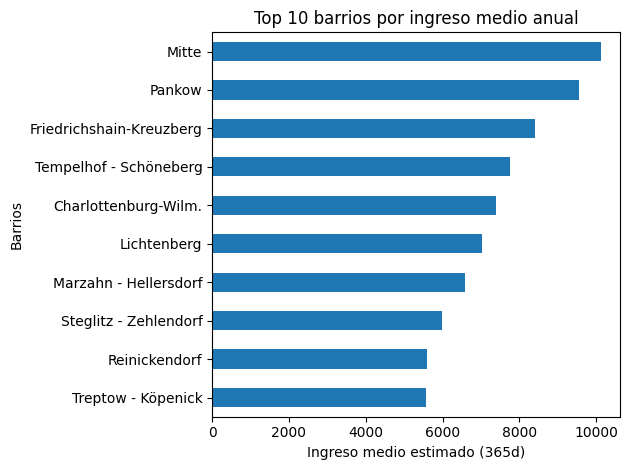

In [ ]:
# Segun el analisis realizado y este resultado estos serian los barrios mas rentables
top_10_barrios = df_clean.groupby('neighbourhood_group_cleansed')["estimated_revenue_l365d"].agg(['mean','count','median']).sort_values('mean',ascending=False).head(10)
print(f'Top de los 10 barrios mas rentables: {top_10_barrios.index}')

top_10_barrios['mean'].sort_values().plot(kind="barh")
plt.title("Top 10 barrios por ingreso medio anual")
plt.xlabel("Ingreso medio estimado (365d)")
plt.ylabel("Barrios")
plt.tight_layout()
plt.show()

# Como se muestra en el grafico los barrios mas rentables son los que muestra en el grafico entre una relacion de la ganancia estiamada en 1 año por varrio en el grafico de barras.
# Donde Mitte es el mas rentable.
# Cabe mencionar que tuvo un 35% de datos vacios y se tubo que realizar una imputacion logica a esa columna asi que puede estar algo sesgada la informacion sobre los barrios mas rentables.

## 🚀 4.2. Qué características (amenidades) permiten cobrar más por noche?


Amenidades requeridas segun el analisis previo: ['Wifi', 'Kitchen', 'Essentials', 'Smoke alarm', 'Hair dryer', 'Hot water', 'Hangers', 'Heating', 'Dishes and silverware', 'Bed linens', 'Cooking basics', 'Refrigerator', 'Washer', 'Iron', 'Dedicated workspace', 'Shampoo', 'Hot water kettle', 'TV', 'Dishwasher']


<Axes: title={'center': 'Impacto de amenidades en precio por noche'}, ylabel='amenidad'>

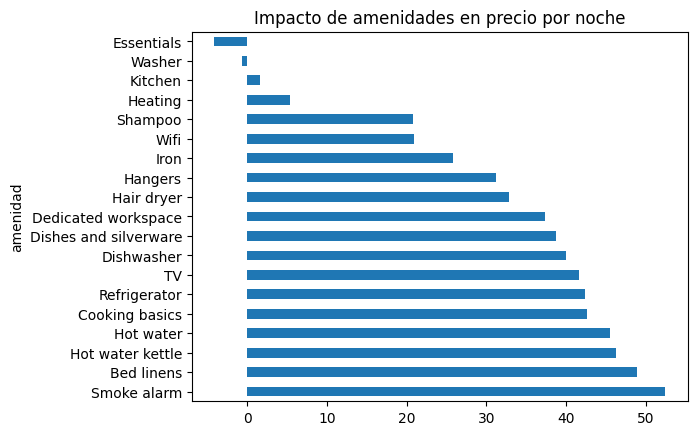

In [ ]:
# Para responder esto tendriamos evaluar entre todos los registros del dataset cuales amenidades se repiten de la lista que hemos obtenido anteriormente.
print(f'Amenidades requeridas segun el analisis previo: {amenidades_required}')

# A partir de esto realizamos una lista con estos valores colocaremos la amenidad, si contiene, si no contiene y la diferencia por el promedio
result = []
for amenity in amenidades_required:
  con = df_clean[df_clean['amenities'].astype(str).str.contains(amenity, case=False, na=False)]['price'].mean()
  sin = df_clean[~df_clean['amenities'].astype(str).str.contains(amenity, case=False, na=False)]['price'].mean()
  result.append((amenity, con, sin, con-sin))

#Luego lo convertimos en dataframe

result_df = pd.DataFrame(result, columns=['amenidad', 'precio_con', 'precio_sin', 'diferencia']).sort_values('diferencia', ascending=False)

result_df.plot(
    x='amenidad',
    y='diferencia',
    kind="barh",
    legend=False,
    title="Impacto de amenidades en precio por noche"
)

# Como dice el grafico la alarma de humo, bedlinens etc, son los mas requeridos en una propiedad rentable. Considerar que el wifi no esta entre las primeras para los visitantes
# Se debe considerar que este analisis no tiene un analisis mas profundo para tener algo mas preciso este analisis es para concluir de acuerdo al analisis realizado.

## 🚀 4.3. Cómo se distribuye la demanda a lo largo del año?


📈 Análisis de Demanda y Ocupación Mensual

Para determinar la viabilidad de una inversión, no basta con mirar el precio; debemos entender la tasa de ocupación. A continuación, transformamos la métrica anual de ocupación estimada en una métrica mensual para visualizar la frecuencia de reservas. Esto nos permitirá identificar si el mercado está dominado por propiedades de alta rotación o por anuncios con baja actividad.

El total de registros es [252   0 186  50 255  28  13 189 180 176  38 139 227 151 101  25 113 184
  88 164 200 214 126  76 239  63 202 196  60  70 190 240  20  32 168 210
 144  14  56 140  42 120  98 112 216 160 100 124  54 108  84 174 178 116
 224 232  58  80  96  64 234 154  16 238 220  48  22  18  40 208 130  30
  72  52  26 228 150 182 128 188]


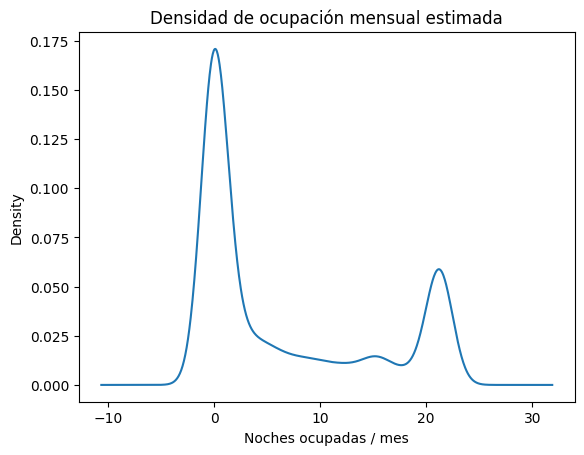

In [ ]:
# # Para obtener este debemos revisar la columna estimated_occupancy_l365d

# print(f'El total de registros es {df_clean['estimated_occupancy_l365d'].unique()}')

# (df_clean['estimated_occupancy_l365d']/12).plot(kind="density")
# plt.title("Densidad de ocupación mensual estimada")
# plt.xlabel("Noches ocupadas / mes")
# plt.show()

# # La demanda de las propiedades con 0-3 de noches ocupadas es porque tienen baja demanda es baja y hay pocas reservas
# # Por otro lado en el pico desde 20 -23 de noches ocupadas es porque tiene alta demanda.
# # Si existe bastante demanda pero debemos seguir analizando la razon de la baja demanda y revisar en que fechas es baja la demanda para considerarlo en el reporte

## 4️⃣ Fase 5: Reflexión y buenas prácticas

## 🚀 5.1. Pregunta 1:
### 5.1.1. ¿Qué desafíos específicos encontraste al transformar columnas de texto no estructurado (como la lista de amenities o el price con símbolos) en variables numéricas útiles?

Respuesta 5.1.1: Dentro de los desafios que nos encontramos fue la transformacion de la columna de amnities en listas y luego sacar la informacion



```
for amenity in amenidades_required:
  df_clean[f'has_{amenity.replace(' ','_').lower()}'] = df_clean['amenities'].apply(lambda x: 1 if f'{amenity}' in x else 0)

df_clean.filter(regex='has_').head()
```


Ese codigo si nos costo entenderle porque primero no se entendia claramente por donde debia empezar para sacar los amenities pero se decidio realizarlo
por la mayor coincidencia entre los items de las listas que cada propiedad tenia. Tambien decidimos tomar los amenities que sean mayor o igual aun 40%
entre el total de propiedades que la tienen con respecto al total de propriedades de alquiler con esto podriamos tener mayor claridad de que items que mas contienen las propiedades.


### 5.1.2. ¿Cómo impactaría en el negocio si no se hubieran limpiado correctamente estos caracteres antes del análisis?




Respuesta 5.1.2: Impacataba demasiado. Si no se limpiaba tendriamos problemas de entender la data de esta capital especificamente. Aunque sigue teniendo
algunas dudas por como esta realizada la limpieza porque se planteo colocarlos con binario algunas columnas y eliminar columnas que se analizo que no eran
relevantes debido a su cantidad de registros sin valor. Por que la otra opcion era tomar un nuevo dataset para validar si es diferente. El grafico del dataset con outliers nos muestra claramente el problema de no limpiarlo.


## 🚀 5.2. Pregunta 2: Al aplicar el método del Rango Intercuartílico (IQR) para filtrar precios:

### 5.2.1. ¿Consideras que esta técnica fue totalmente efectiva o existe el riesgo de haber eliminado propiedades de "Lujo" legítimas (información valiosa)?

Consideramos que obtener los registros con mayor distribucion normal es los mas fundamental para la validacion de los datos y en si la limpieza de los outliers. Hay informacion que si se perdio debido a que eran valores bastante fuera de la media de los datos. Si limpiabamos mas podriamos perder los datos y eso provocaria que no tuvieramos los datos sufiecientes para analizar.

Se podria usar otras funciones como una que leimos que era logaritmica que nos recomendaba la IA para datos asimetricos que es nuestro caso.

### 5.2.2. ¿Qué estrategia alternativa propondrías para separar "errores de carga" de "propiedades exclusivas"?

Cremos que para los errores de carga(datos invalidos) deberiamos revisar si son columnas relevantes. Si en tal caso son relevantes creo que es mejor crear una columna para hacerla binario booleano y validar inicialmente en esta columna para luego usar el dato para no sesgar. Las propiedades exclusivas son valores fuera de la media pero debemos entender algo. Como consultora de inversiores y ellos quieran ir con algo grande esas propiedades son clave de analisis de ellos porque pueden notar que no es necesario realizar una inversion grande en algo muy lujoso y de alta experiencia, sino en algo simple y segun los datos com mayor capacidad en lugares turisticos concurrentes.



## 🚀 5.3. Pregunta 3: En el caso de los review_scores_rating faltantes,

### 5.3.1. ¿Qué método de imputación elegiste (media, mediana, cero o eliminación) y cómo justificas esa decisión desde la perspectiva del comportamiento del usuario en una plataforma de viajes? (e.g.,¿La ausencia de review significa un servicio promedio o un servicio malo?).

El metodo de imputacion que elegimos fue cero, porque el cero significa que no hubo una opinion y adicional creamos una columna que permite validar si tiene una resena realizada. EL metodo de la mediana y media en nuestro caso no seria conveniente porque los datos quedan demasiado sesgado y es un escenario donde los datos no son la realidad y es mejor analizarlo por otras caracteristicas y datos. Al final se concluyo tambien que esas propiedades por esto



```
# Para confirmar cuales propiedades son nuevas realizaremos esta validacion
nulos_new_properties = df_clean[(df_clean['review_scores_rating'] == 0) & (df_clean['number_of_reviews'] == 0)]
print(f'Propiedades nuevas sin reviews y rating es: {nulos_new_properties.shape[0]}')

#Luego de validar todo lo anterior encontramos que si son propiedades nuevas sin rating y se puede tratar como lo pensamos
```
Por esa razon tenemos 1/4 del dataset es de propiedades nuevas. El criterio mas acertado de acuerdo a la matriz de correlacion de precio vs capacidad es tener una capacidad relacionada con el precio y eso da mas popularidad a la propiedad.

Finalmente, la ausencia si dio un sesgo en la matriz de correlacion pero es preferible revisar otros datos para ver cuales son las mejores caracteristicas para ser mas rentable.




## 🚀 5.4. Pregunta 4:

### 5.4.1. ¿De qué manera la visualización geoespacial (scatter plot con latitud/longitud) reveló patrones de precios que las estadísticas descriptivas (como el simple promedio por barrio) no lograron mostrar?

Se pudo visualizar de dos maneras, mediante una cercania en Berlin para diferenciarlo por colores de acuerdo a la localidad y tambien en el mapa de Europa para visaulizar el pais en si, este ultimo no nos dice mucho.

El primero si tiene un claro patron es que el pueblo de Mitte
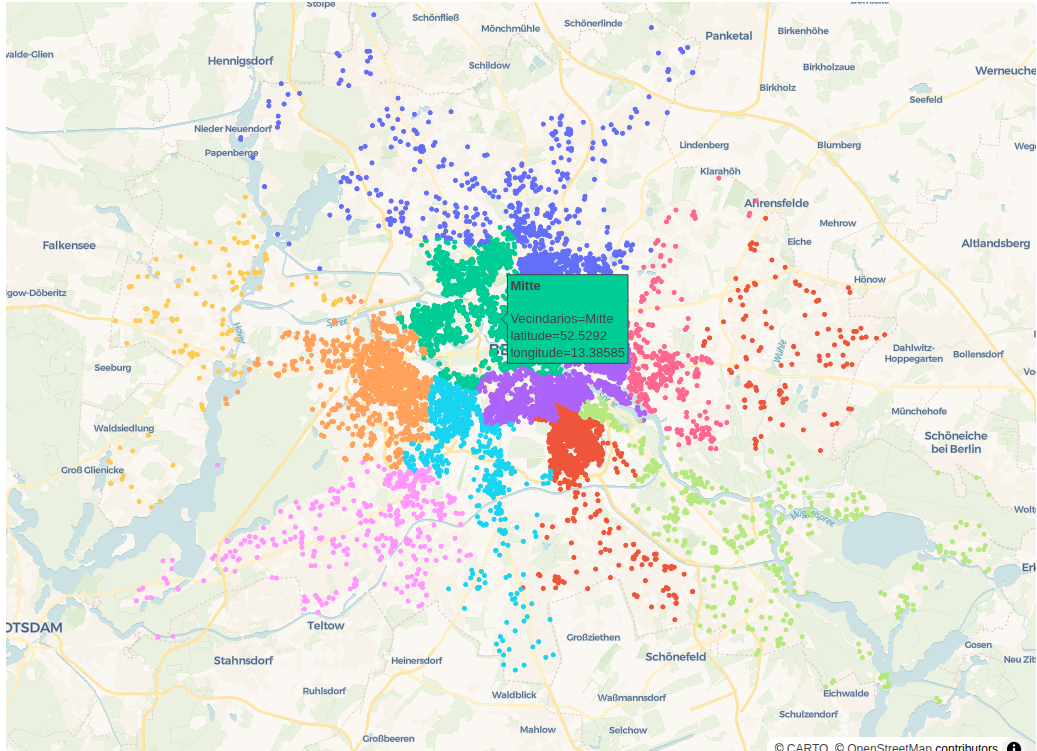

## 🚀 5.5. Pregunta 5:

### 5.5.1. Indica al menos dos buenas prácticas que implementarías en un pipeline de ingeniería de datos para automatizar este proceso si tuvieras que recibir este archivo actualizado mes a mes (ej. validación de esquemas, funciones modulares, logs de errores).

En un pipeline creo q es importante tener los pasos claros de la limpieza de datos. Validar las columnas y dependiendo del tipo de dato realizar un breve grafico o resumen de que datos existen y que tan bueno es el dataset. Luego realizar en funciones modulares igualmente por tipo de dato realizar la estrategia de imputacion en los datos que creamos necesarios.

Finalmente, devolvernos un dataset limpio para empezar a realizar el EDA mas rapido y facil. Podria ser parametrizable para ciertos datos o colocar las columnas conocidas del dataset para que sea aun mas automatico.


## 6️⃣ Fase 6: Aplicación al entorno profesional

## 🚀 Redacta una sección final de aplicación:
- Cada miembro del equipo colocara su nombre una explicación de como aplicaría
lo aprendido en esta semana en su entorno profesional.

# **Christian Carrera**

En mi ejercicio profesional usare este conocimiento para realizar un aplicativo para analizar las historias de usuario de mi equipo y visualizar tendencias en las entregas y rendimientos. Creare un pipeline para limpiar los datos y visualizare esos datos importantes que me sirven para saber la velocidad del equipo, cuantas historias promedio son finalizas y cuantas quedan arrastradas y ver una matriz de correlaccion para intentar encontrar patrones en el comportamiento de los integrantes de mi equipo.

# **Alexander Luna**

Como desarrollador de software en el Registro de la Propiedad y Mercantil de Rumiñahui, la aplicación de los conceptos de ingeniería de datos revisados esta semana es fundamental para la modernización de nuestros servicios. Implementar procesos automatizados de limpieza y validación de datos (como los pipelines de la Fase 4) permitiría reducir errores en la migración de información registral histórica a sistemas digitales. Además, el análisis estadístico y la normalización de datos me ayudan a construir bases de datos más robustas y eficientes, asegurando que la información de predios y gravámenes sea íntegra y de fácil acceso para los ciudadanos, mejorando así la calidad del software que desarrollamos institucionalmente.

# **Romel Cerna**

Como Soporte de Aplicaciones en banca, este ejercicio se relaciona directamente con mi trabajo.
Las actividades realizadas, como la limpieza de datos, el tratamiento de valores nulos, la validación de registros y la creación de variables derivadas, son equivalentes a los controles y transformaciones que se aplican en los procesos ETL y batch.

En mi labor diaria, estos conocimientos se utilizan para asegurar la calidad de la información, evitar errores en los procesos automáticos y garantizar que los datos financieros sean confiables antes de ser utilizados en reportes o análisis. Además, el uso de reglas de negocio y validaciones permite detectar inconsistencias de manera temprana y mejorar la estabilidad de los procesos.